In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

# Load Data


In [3]:
df = pd.read_csv('https://drive.usercontent.google.com/u/0/uc?id=1kI50MAlemPjram18CbMFUE-nPXcoqAut&export=download')

In [4]:
!pip install scikit-optimize imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.5 MB/s eta 0:00:00


In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [9]:
df.dropna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [11]:
columns = ['id', 'age', 'avg_glucose_level', 'bmi', 'stroke']
n_df = df[columns]

In [12]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} distinct value")

id: 5110 distinct value
gender: 3 distinct value
age: 104 distinct value
hypertension: 2 distinct value
heart_disease: 2 distinct value
ever_married: 2 distinct value
work_type: 5 distinct value
Residence_type: 2 distinct value
avg_glucose_level: 3979 distinct value
bmi: 418 distinct value
smoking_status: 4 distinct value
stroke: 2 distinct value


In [13]:
df = df.drop(columns=['id'])

In [14]:
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

In [15]:
#Numerical and categorical variables
numCols = ['age', 'avg_glucose_level', 'bmi']
catgCols = ['gender','hypertension',	'heart_disease',	'ever_married', 'work_type', 'Residence_type', 'smoking_status']
colsPlot = numCols + catgCols

# EDA

In [16]:
strokeCount = df['stroke'].value_counts()
strokeRate = strokeCount[1] / len(df) * 100
print(strokeCount)
print(f"Stroke Rate: {strokeRate:.2f}%")

stroke
0    4861
1     249
Name: count, dtype: int64
Stroke Rate: 4.87%


## Data Visualization

### Stroke Distibution

<ipython-input-17-f4b84af0d74c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='muted')


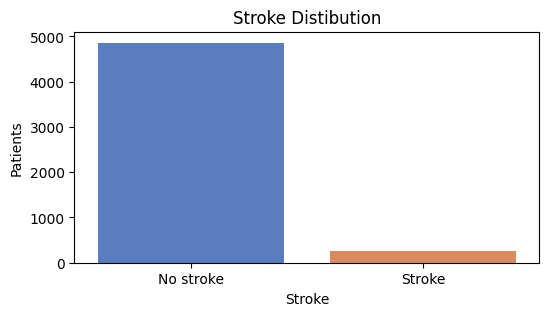

In [17]:
plt.figure(figsize=(6, 3))
sns.countplot(x='stroke', data=df, palette='muted')
plt.xticks([0, 1], ['No stroke', 'Stroke'])
plt.xlabel('Stroke')
plt.ylabel('Patients')
plt.title('Stroke Distibution')
plt.show()

### Pie Chart

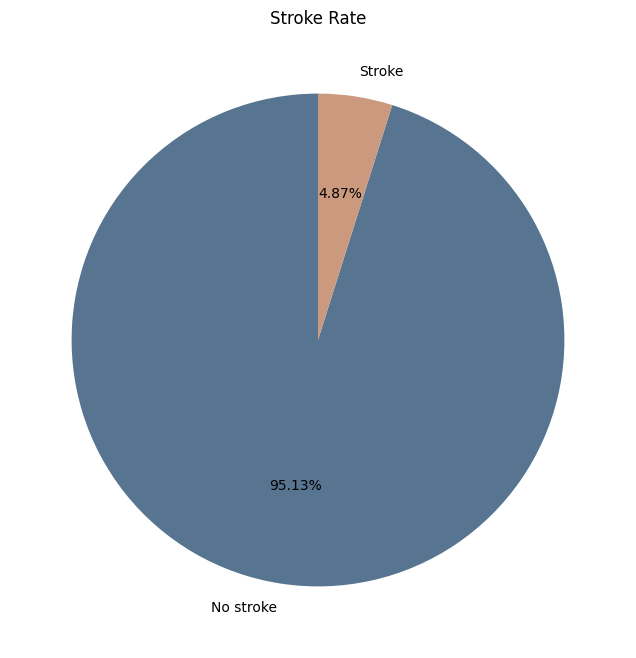

In [18]:
plt.figure(figsize=(8, 8))
labels = ['No stroke', 'Stroke']
plt.pie(df['stroke'].value_counts(), autopct='%1.2f%%', labels = labels, startangle=90, colors=['#577590', '#cb997e'])
plt.title('Stroke Rate')
plt.show()

### Histogram

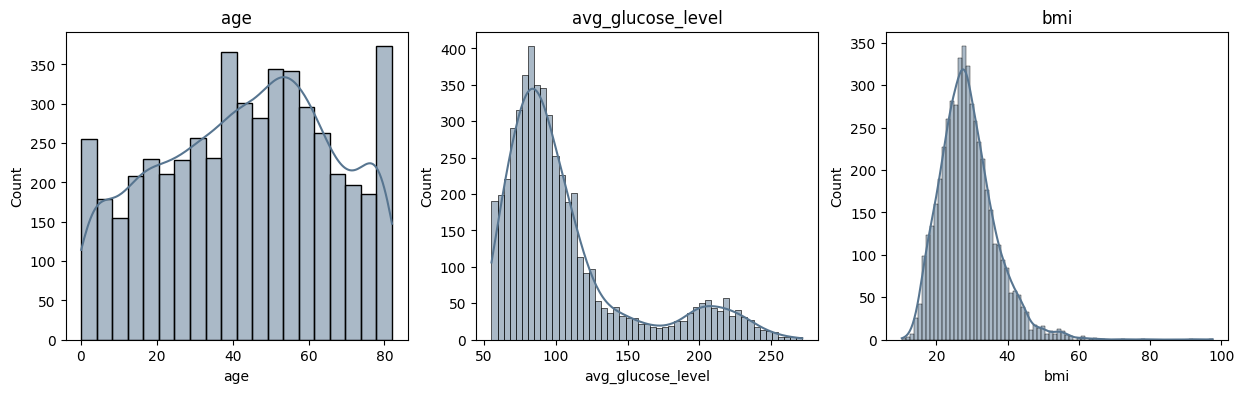

In [19]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(numCols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], color='#577590', kde=True)
    plt.title(f'{col}')
plt.show()

### Countplot

<ipython-input-20-c05773a09deb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')
<ipython-input-20-c05773a09deb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')
<ipython-input-20-c05773a09deb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')
<ipython-input-20-c05773a09deb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

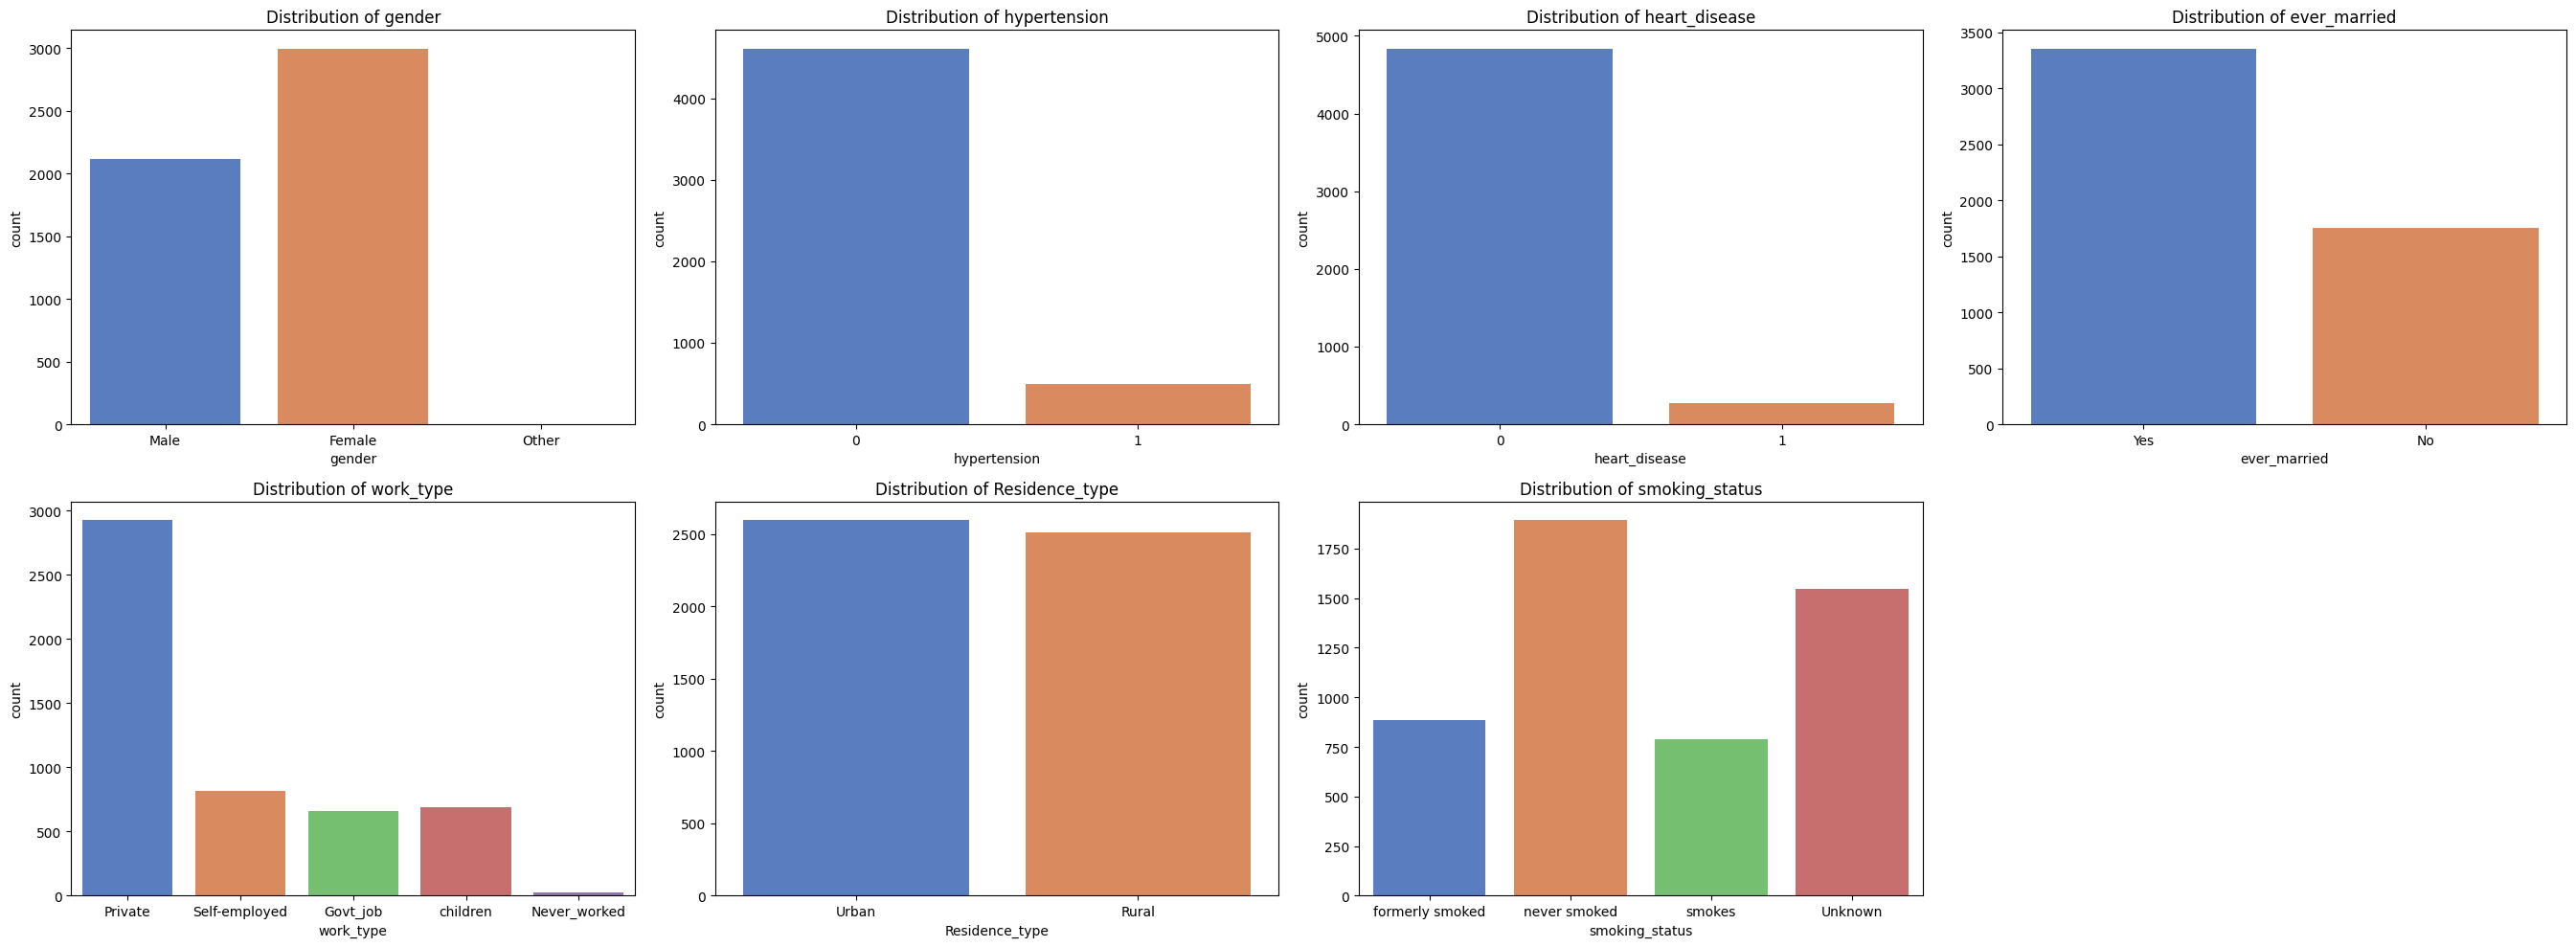

In [20]:
plt.figure(figsize=(27,10))
for i, col in enumerate(catgCols, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, data=df, palette='muted')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Plot (by stroke)

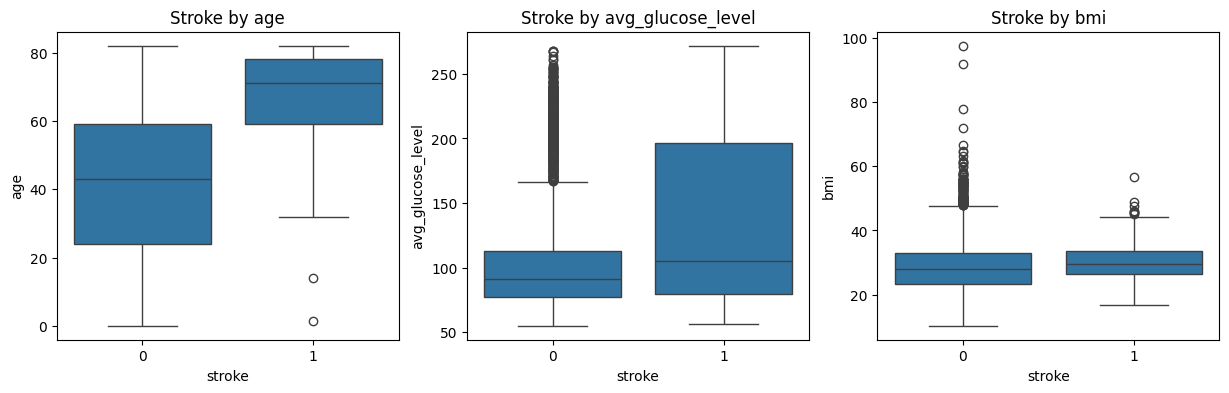

In [21]:
plt.figure(figsize=(15,4))
for i, col in enumerate(numCols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'Stroke by {col}')
plt.show()

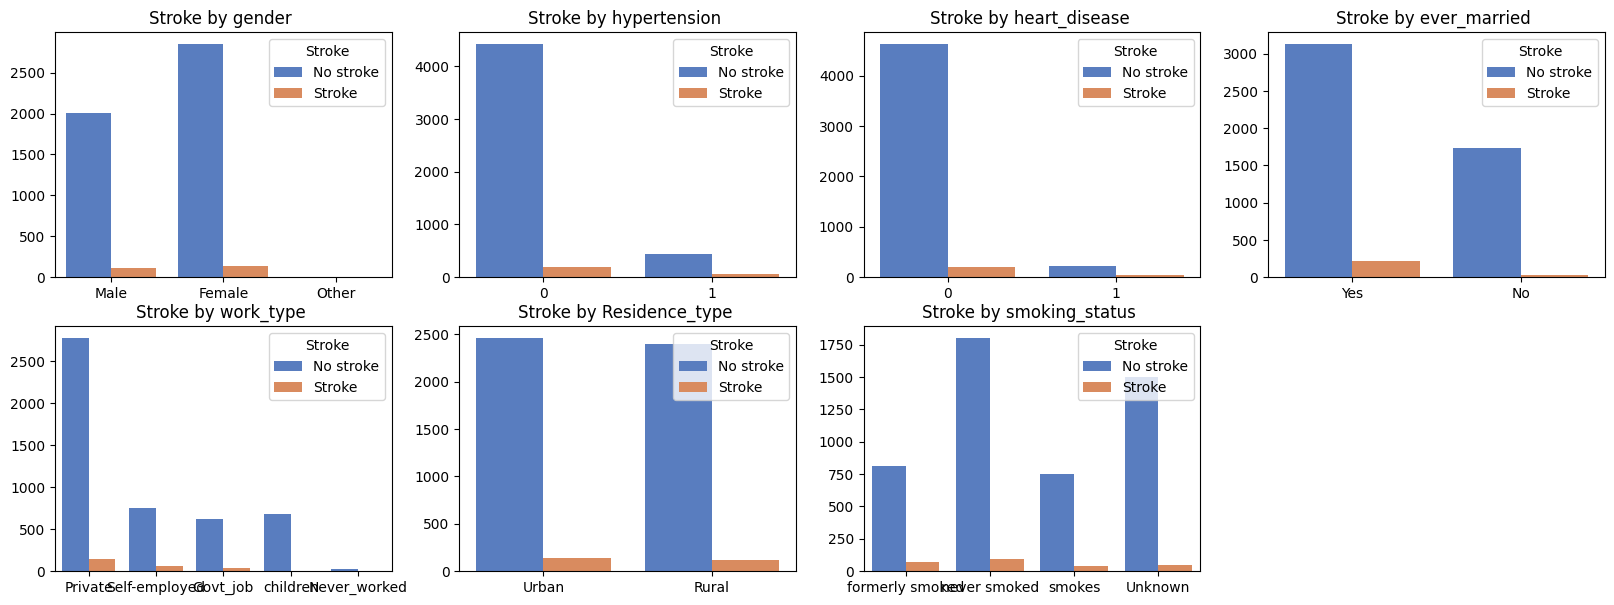

In [22]:
plt.figure(figsize=(20, 7))
num_cols = len(catgCols)
cols_per_row = int(np.ceil(num_cols / 2))

for i, col in enumerate(catgCols, 1):
    plt.subplot(2, cols_per_row, i)
    sns.countplot(x=col, hue='stroke', data=df, palette='muted')
    plt.title(f'Stroke by {col} ')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(title='Stroke', labels=['No stroke', 'Stroke'])
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

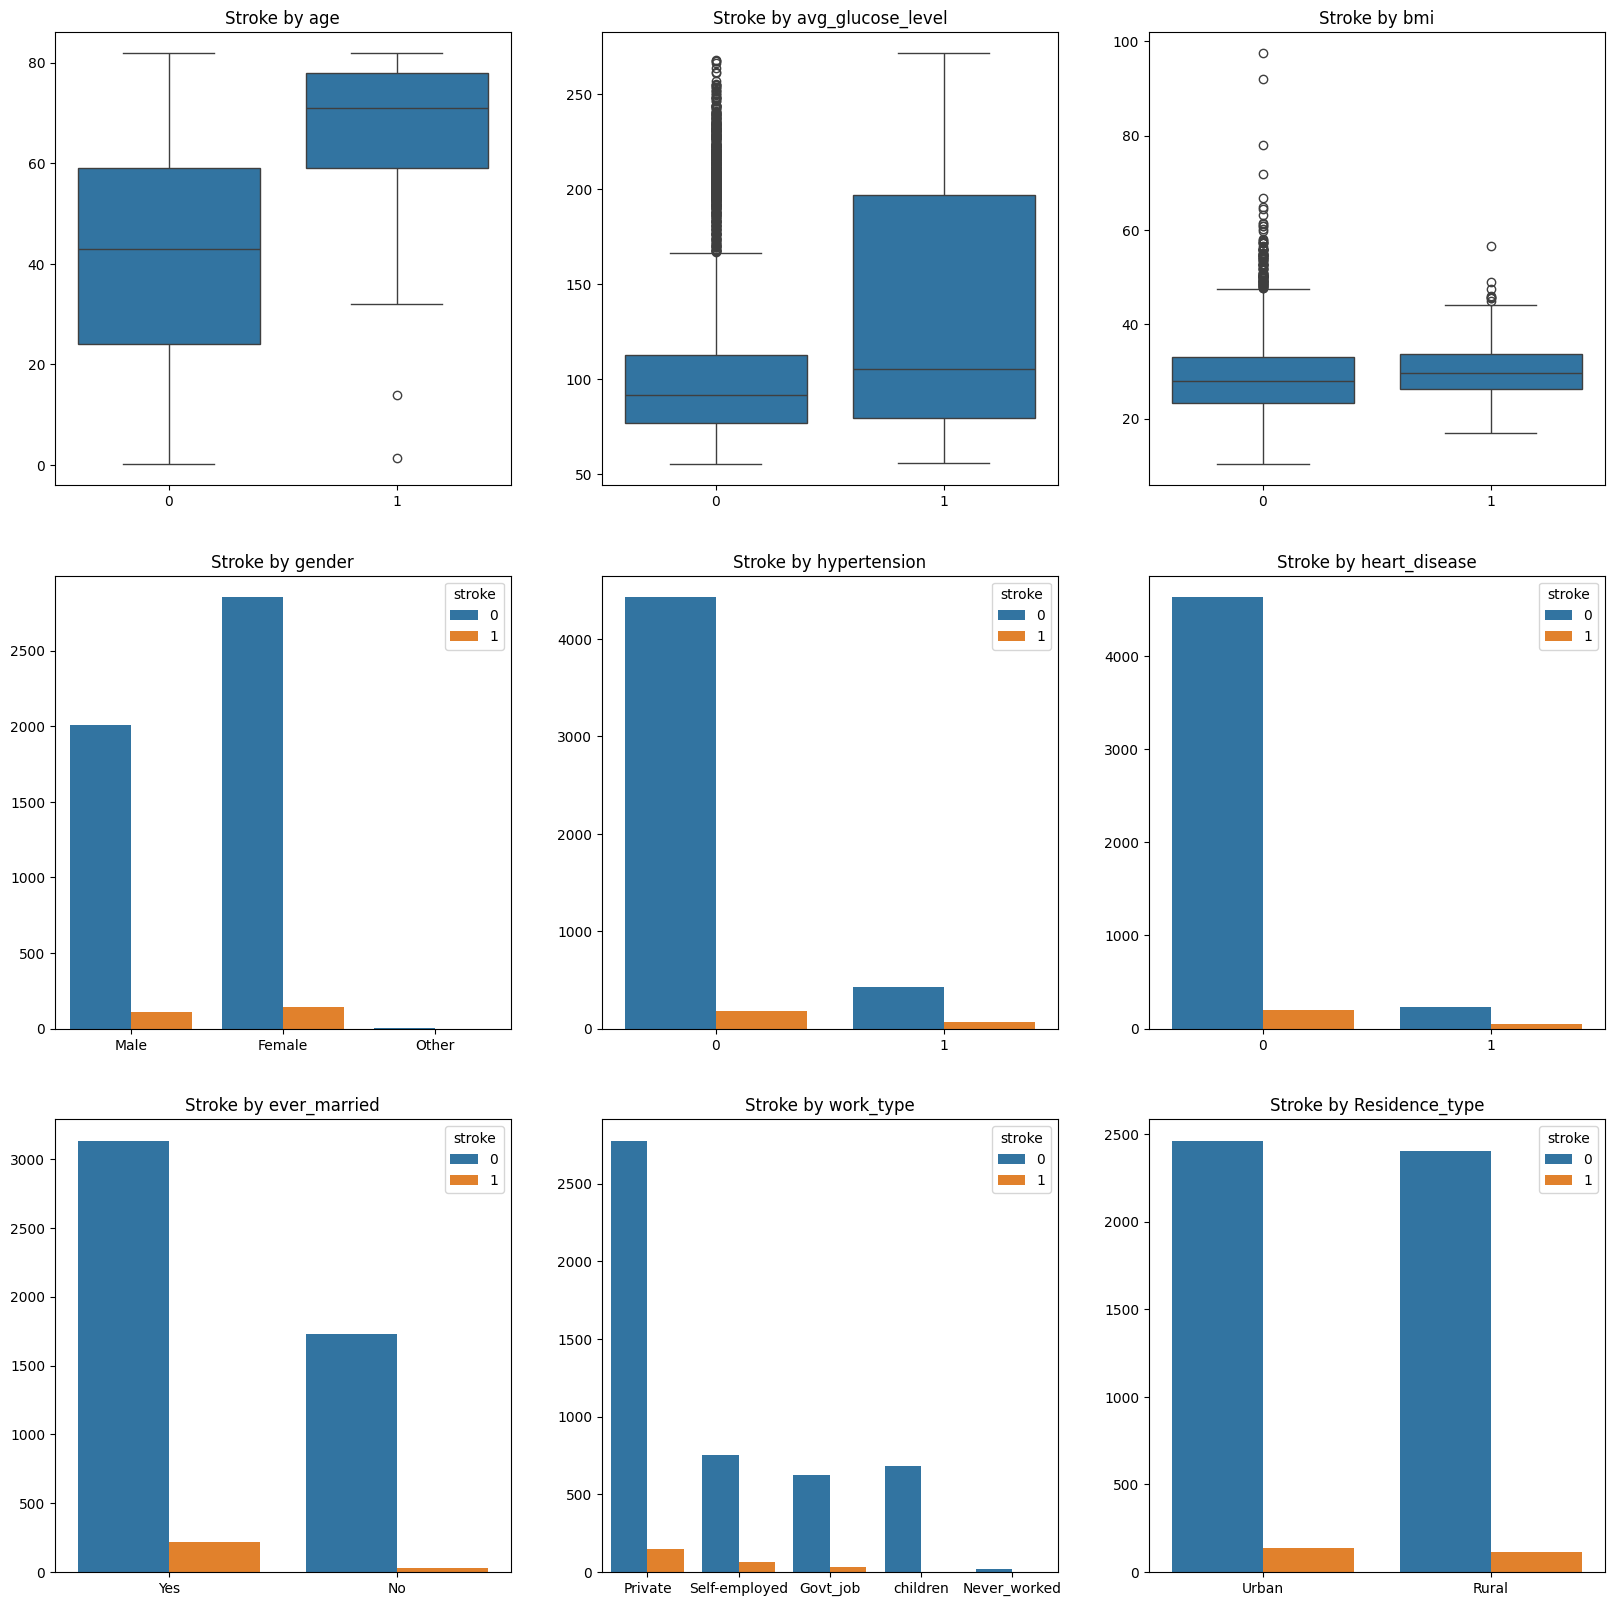

In [24]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(colsPlot, 1):
    plt.subplot(3, 3, i)

    if col in numCols:
      sns.boxplot(x='stroke', y=col, data=df)
      plt.title(f'Stroke by {col}')
    else:
        sns.countplot(x=col, hue='stroke', data=df)
        plt.title(f'Stroke by {col}')
    plt.ylabel('')
    plt.xlabel('')
plt.show()

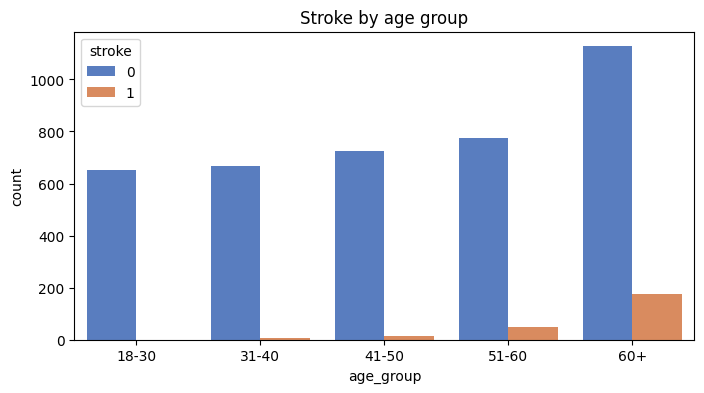

In [25]:
#Stroke by age group
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
plt.figure(figsize=(8, 4))
sns.countplot(x='age_group', hue='stroke', data=df, palette='muted')
plt.title('Stroke by age group')
plt.show()

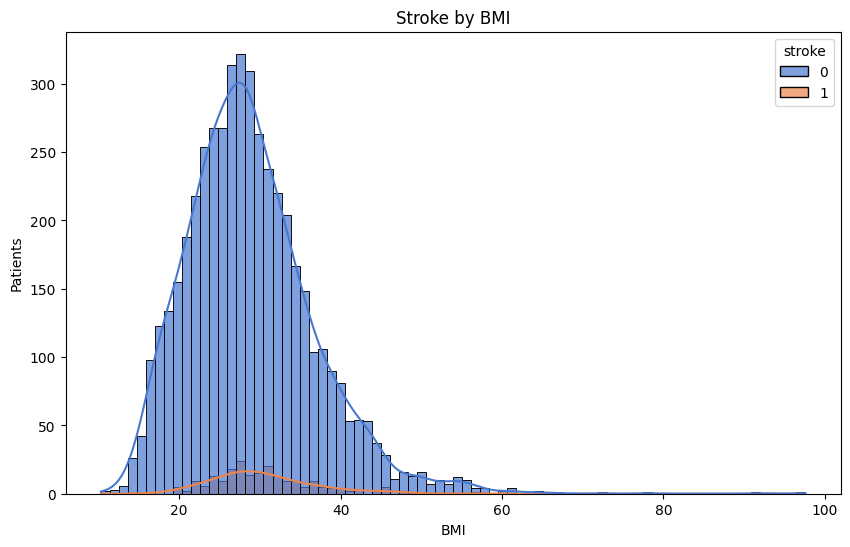

In [26]:
#Stroke by BMI
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='stroke', kde=True, palette='muted', edgecolor='black', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Patients')
plt.title('Stroke by BMI')
plt.show()

<ipython-input-27-a843264ff341>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Residence_type', y='stroke_percentage', data=country_stroke, palette='muted')


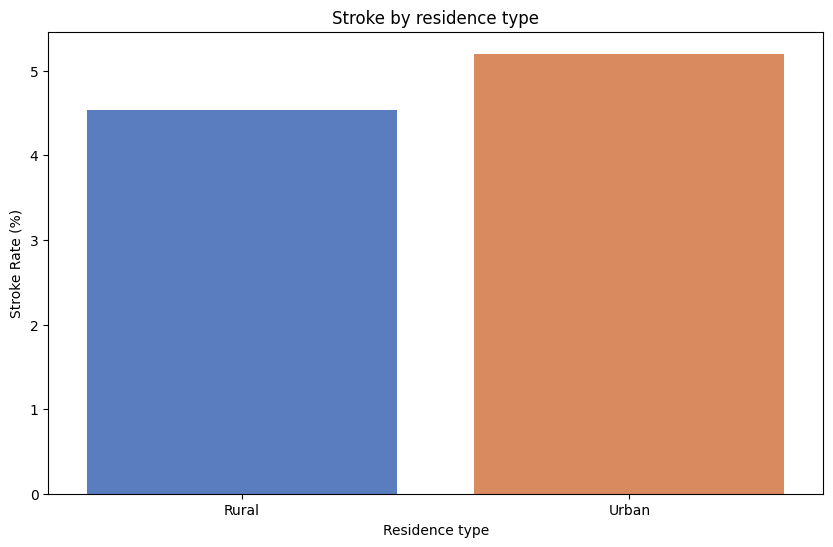

In [27]:
#Stroke by residence
plt.figure(figsize=(10, 6))
country_stroke= df.groupby('Residence_type')['stroke'].mean().reset_index()
country_stroke['stroke_percentage'] = country_stroke['stroke'] * 100
sns.barplot(x='Residence_type', y='stroke_percentage', data=country_stroke, palette='muted')
plt.title('Stroke by residence type')
plt.xlabel('Residence type')
plt.ylabel('Stroke Rate (%)')
plt.show()

<ipython-input-28-706a6407419d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='stroke_percentage', data=gender_stroke, palette='muted')


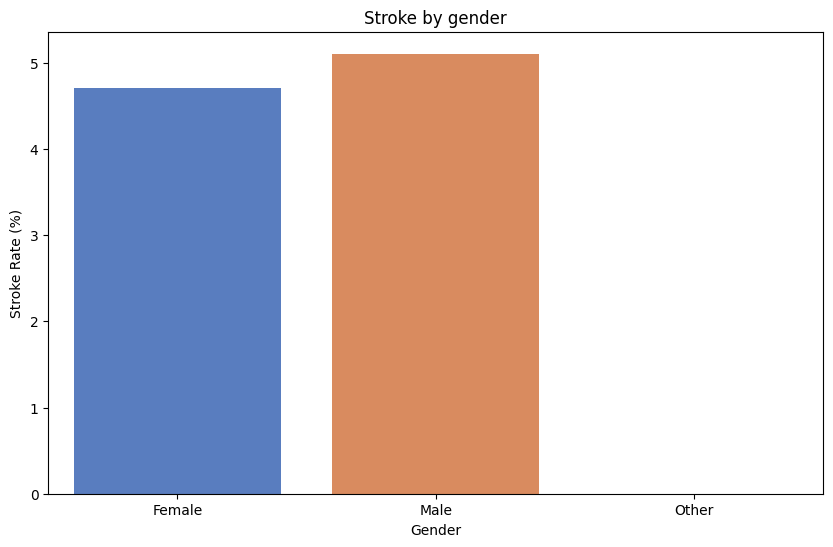

In [28]:
#Stroke by gender
plt.figure(figsize=(10, 6))
gender_stroke = df.groupby('gender')['stroke'].mean().reset_index()
gender_stroke['stroke_percentage'] = gender_stroke['stroke'] * 100
sns.barplot(x='gender', y='stroke_percentage', data=gender_stroke, palette='muted')
plt.title('Stroke by gender')
plt.xlabel('Gender')
plt.ylabel('Stroke Rate (%)')
plt.show()

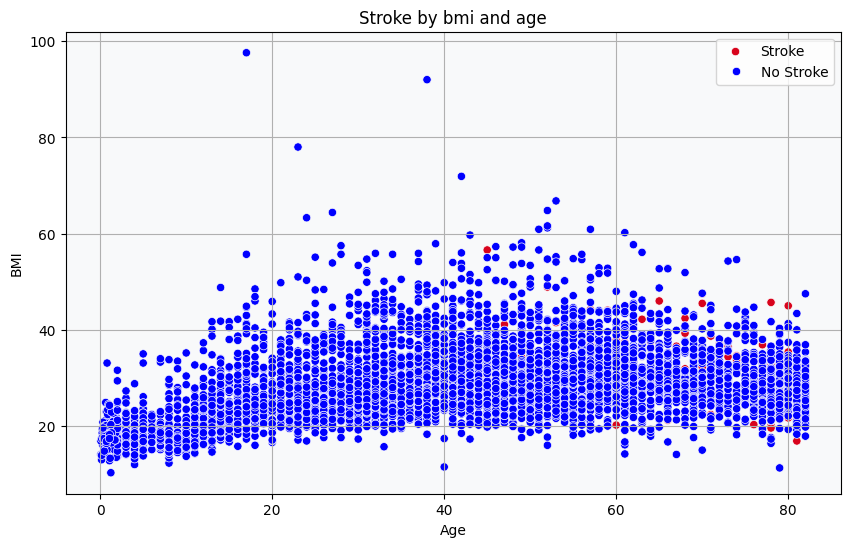

In [29]:
# Stroke by BMI and age
plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='bmi', hue='stroke', data=df, palette=['#0000ff', '#d8031c'])
plt.title('Stroke by bmi and age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(labels=['Stroke', 'No Stroke'])
plt.grid(True)
plt.gca().set_facecolor('#f8f9fa')
plt.show()

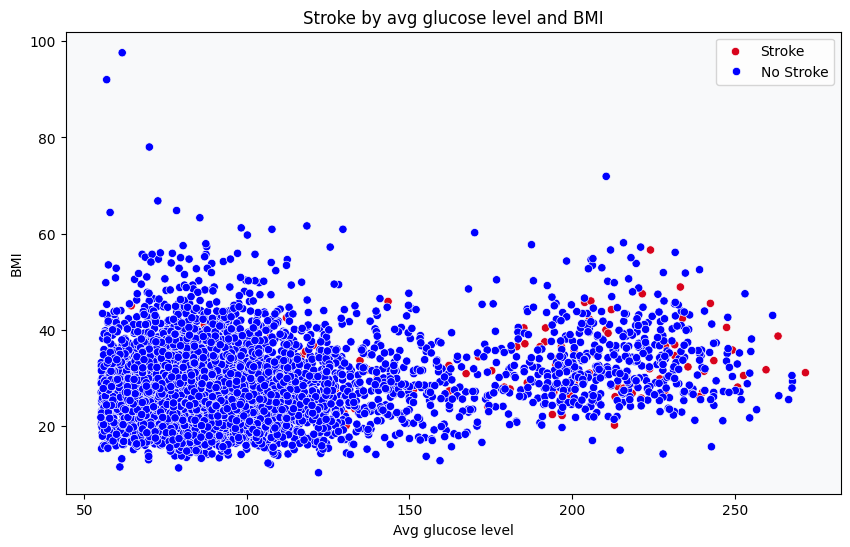

In [30]:
# Stroke by avg_glucose_level and bmi
plt.figure(figsize=(10, 6))

sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df, palette=['#0000ff', '#d8031c'])

plt.title('Stroke by avg glucose level and BMI')
plt.xlabel('Avg glucose level')
plt.ylabel('BMI')
plt.legend(labels=['Stroke', 'No Stroke'])
plt.gca().set_facecolor('#f8f9fa')
plt.show()

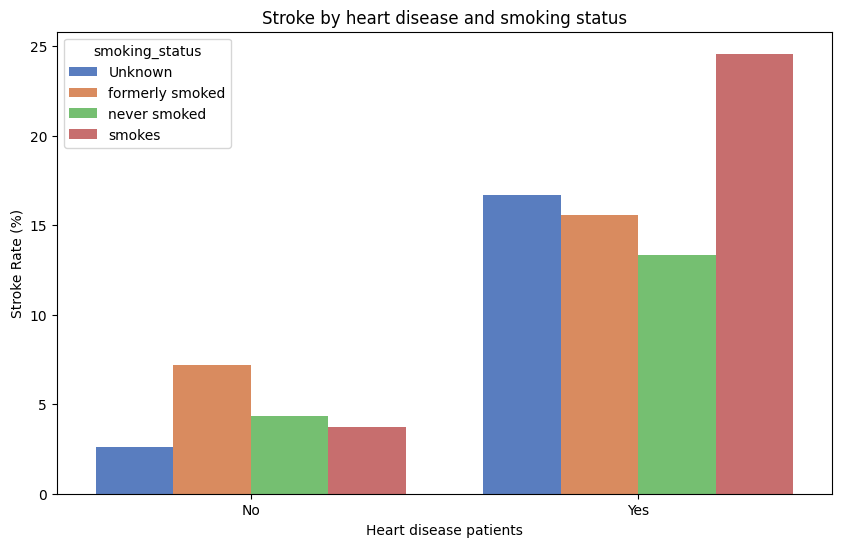

In [31]:
# Stroke by heart disease and smoking status
plt.figure(figsize=(10, 6))
active_stroke = df.groupby(['heart_disease', 'smoking_status'])['stroke'].mean().reset_index()
active_stroke['stroke_percentage'] = active_stroke['stroke'] * 100
plt.xticks([0, 1], ['No', 'Yes'])
sns.barplot(x='heart_disease', y='stroke_percentage', hue='smoking_status', data=active_stroke, palette='muted')
plt.title('Stroke by heart disease and smoking status')
plt.xlabel('Heart disease patients')
plt.ylabel('Stroke Rate (%)')
plt.show()

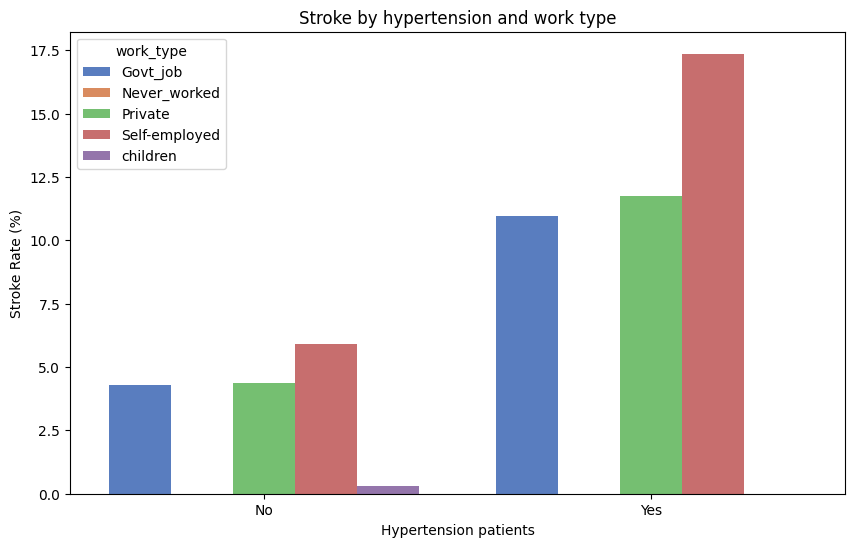

In [32]:
# Stroke by hypertension and work type
plt.figure(figsize=(10, 6))
active_stroke = df.groupby(['hypertension', 'work_type'])['stroke'].mean().reset_index()
active_stroke['stroke_percentage'] = active_stroke['stroke'] * 100
plt.xticks([0, 1], ['No', 'Yes'])
sns.barplot(x='hypertension', y='stroke_percentage', hue='work_type', data=active_stroke, palette='muted')
plt.title('Stroke by hypertension and work type')
plt.xlabel('Hypertension patients')
plt.ylabel('Stroke Rate (%)')
plt.show()

### Heatmap

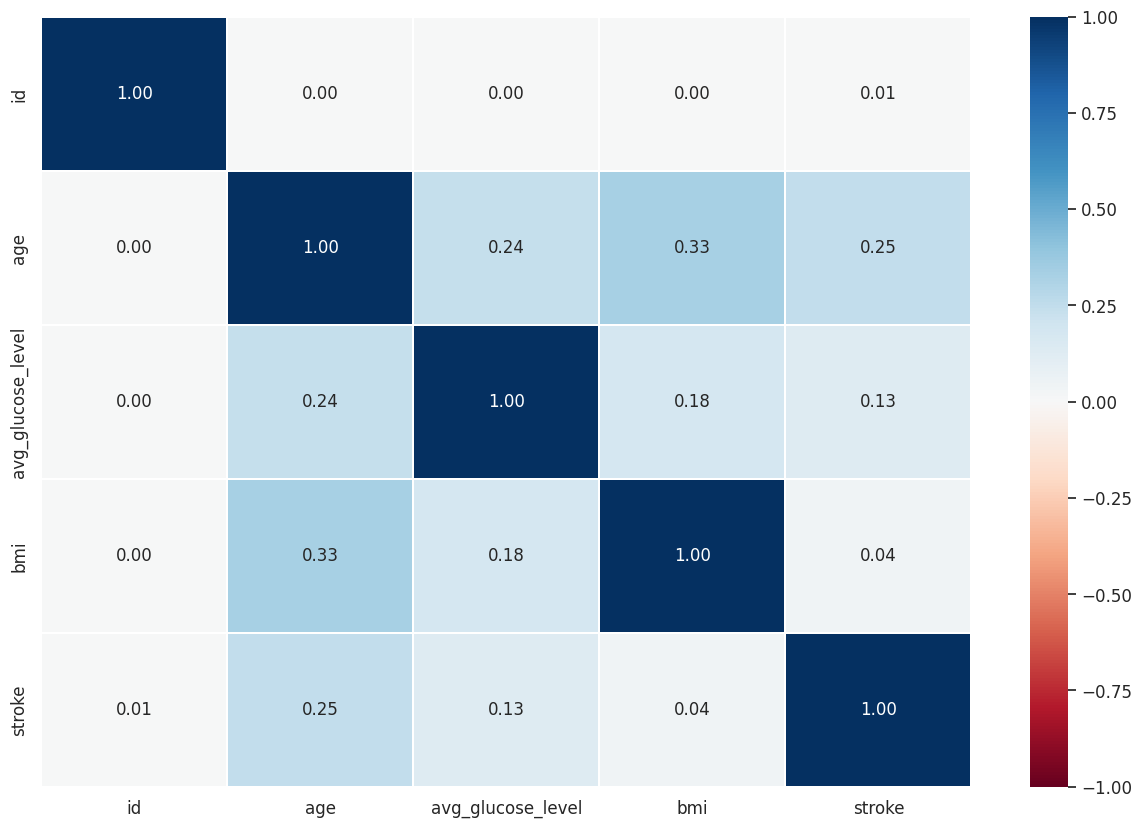

In [33]:
#correlation matrix
corr = n_df.corr()

#Heatmap
plt.figure(figsize=(15,10))
sns.set(font_scale=1.1)
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', vmin=-1, vmax=1, linewidths=1.2, annot_kws={"size":12})
plt.show()

# Model Prediction

In [ ]:
X = df.drop(columns=['id', 'stroke'], errors='ignore')
y = df['stroke']

In [ ]:
#Preprocessing
numCols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
catCols = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numCols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), catCols)
    ]
)

X_processed = preprocessor.fit_transform(X)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_procs = preprocessor.fit_transform(X_train)
X_test_procs = preprocessor.transform(X_test)

In [ ]:
# Replace NaNs with column means
col_means = np.nanmean(X_train_procs, axis=0)

#Fill NaNs in X_train_procs
inds = np.where(np.isnan(X_train_procs))
X_train_procs[inds] = np.take(col_means, inds[1])

#Fill NaNs in X_test_procs
inds_test = np.where(np.isnan(X_test_procs))
X_test_procs[inds_test] = np.take(col_means, inds_test[1])

In [ ]:
# Balance the training set
smote = SMOTE(random_state=42)
X_train_balc, y_train_balc = smote.fit_resample(X_train_procs, y_train)

In [ ]:
from collections import Counter
print("Trước SMOTE:", Counter(y_train))
print("Sau SMOTE:", Counter(y_train_balc))

Trước SMOTE: Counter({0: 3889, 1: 199})
Sau SMOTE: Counter({0: 3889, 1: 3889})


In [ ]:
# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

In [ ]:
# Initialize SVM classifier
svm = SVC(probability=True, random_state=0)

In [ ]:
# Grid search w/ cross-validation
gs_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='recall', n_jobs=-1)

In [ ]:
# Fit model on balanced training set
gs_svm.fit(X_train_balc, y_train_balc)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             scoring='recall')

In [ ]:
# Retrieve best model and make predictions
best_svm_model = gs_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_procs)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       972
           1       0.13      0.38      0.20        50

    accuracy                           0.85      1022
   macro avg       0.55      0.63      0.56      1022
weighted avg       0.92      0.85      0.88      1022



In [ ]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

In [ ]:
# Initialize Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=0)

In [ ]:
# GridSearchCV with cross-validation
gs_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='recall', n_jobs=-1)

In [ ]:
# Fit model on balanced training data
gs_gb.fit(X_train_balc, y_train_balc)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='recall')

In [ ]:
# Get best estimator and make predictions
best_gb_model = gs_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test_procs)

# Evaluation metrics
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       972
           1       0.19      0.64      0.30        50

    accuracy                           0.85      1022
   macro avg       0.59      0.75      0.61      1022
weighted avg       0.94      0.85      0.89      1022



In [ ]:
# Predict test set
y_pred_svm = gs_svm.best_estimator_.predict(X_test_procs)
y_pred_gb = gs_gb.best_estimator_.predict(X_test_procs)

# Compute metrics for SVM
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Compute metrics for Gradient Boosting
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

#Results
print("\nModel Evaluation Metrics\n" + "-" * 35)
print("{:<12} {:<10} {:<15}".format("Metric", "SVM", "Gradient Boost"))
print("-" * 35)
print("{:<12} {:<10.3f} {:<15.3f}".format("Precision", svm_precision, gb_precision))
print("{:<12} {:<10.3f} {:<15.3f}".format("Recall", svm_recall, gb_recall))
print("{:<12} {:<10.3f} {:<15.3f}".format("F1-score", svm_f1, gb_f1))


Model Evaluation Metrics
-----------------------------------
Metric       SVM        Gradient Boost 
-----------------------------------
Precision    0.135      0.193          
Recall       0.380      0.640          
F1-score     0.199      0.296          
